In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [19]:
import yfinance as yf
# Define the stock ticker symbol and date range
symbol = "AAPL"
start_date = '2010-01-01'
end_date = '2023-09-29'

# Scraping the data from yahoo finance data website
df = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [22]:
 # getting final few rows of data in the data frame
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3453,2023-09-22,174.669998,177.080002,174.050003,174.789993,174.789993,56663000
3454,2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
3455,2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
3456,2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
3457,2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400


In [21]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [23]:
# removes the Date and Adj Close columns
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


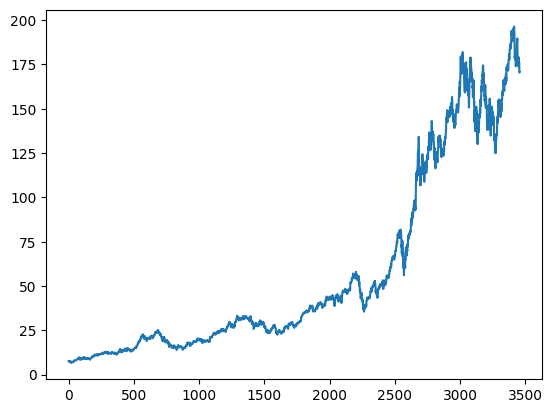

In [24]:
plt.plot(df.Close) # see the closing price of Apple stock

In [25]:
# 100 day MA, in the 101 index, finds mean of previous 100 values
ma100 = df.Close.rolling(100).mean()
# first 100 days wont be displayed since 100 day moving average starts from 101 index as it needs the previous 100 days
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3453    181.909000
3454    181.984400
3455    182.029501
3456    182.075901
3457    182.047101
Name: Close, Length: 3458, dtype: float64

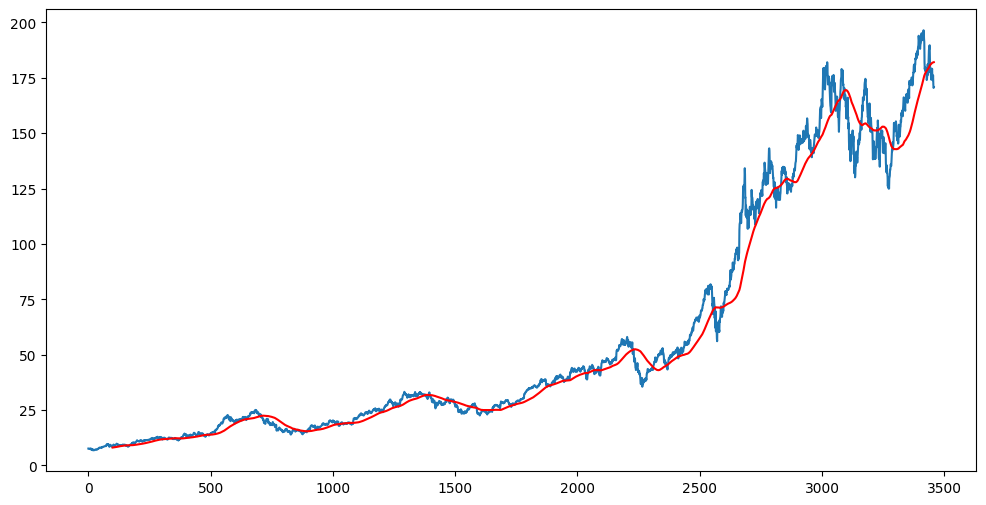

In [26]:
# plot moving average on closing price graph
# defining the figure size
plt.figure(figsize = (12,6)) 
# plotting the closing price
plt.plot(df.Close) 
# on top of closing price 100 day moving average is plotted in red
plt.plot(ma100, 'r') 

In [27]:
# 200 day moving average
ma200 = df.Close.rolling(100).mean()
ma200 # values start from 201 index


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3453    181.909000
3454    181.984400
3455    182.029501
3456    182.075901
3457    182.047101
Name: Close, Length: 3458, dtype: float64

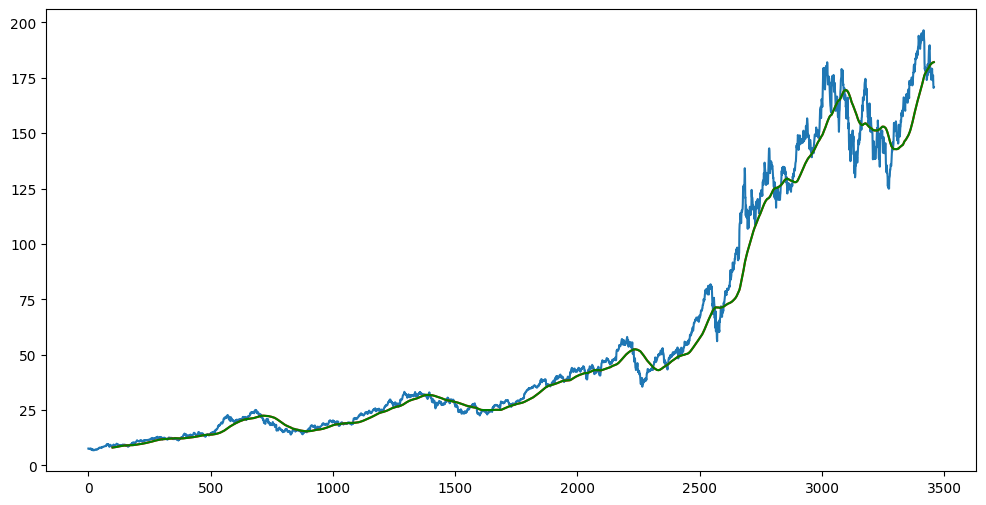

In [32]:
# defining the figure size
plt.figure(figsize = (12,6)) 
# plotting the closing price
plt.plot(df.Close) 
# on top of closing price, 100 day moving average is plotted in red
plt.plot(ma100, 'r') 
# on top plotting 200 day moving average is plotted in green
plt.plot(ma200, 'g')




In [33]:
df.shape #(rows,columns)

(3458, 5)

In [35]:
# splitting data in training and testing
# first 70% of data used as training data for the model
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
# last 30% used for testing
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2420, 1)
(1038, 1)


In [36]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [37]:
data_testing.head()

,Close
2420,50.435001
2421,51.625000
2422,52.587502
2423,52.590000
2424,53.160000


In [41]:
from sklearn.preprocessing import MinMaxScaler
# scaled down training data using MinMaxScaler for the LSTM model
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
data_training_array = scaler.fit_transform(data_training)
# convert scaled down data into array
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.84562699],
       [0.88711566],
       [0.85671997]])

In [44]:
data_training_array.shape

(2420, 1)

In [47]:
# 34 36 33 40 39 38 37 42 44 38: 10 days (steps) of stock price data
# value of 11th day is dependent on previous 10 values
# time series analysis analogy : price on particular day is dependent on previoud few days
# first 100 steps will be our x_train
# and day after will be y_train (101th day)
# say now want 102nd day (y_train) then remove first day from previous 100 and now add 101th day(sliding scale)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) #starts from 0 to 100
    y_train.append(data_training_array[i, 0]) #only one column

# convert into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [49]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
# creates a sequential model, which is a linear stack of layers
# LSTM-based model designed to learn patterns in time series data
# Long Short-Term Memory networks (LSTM) are a type of recurrent neural network (RNN) architecture designed to handle sequences of data, such as time series
# Due to presence of memory cells and gates, LSTMs are capable of learning long-term dependencies in data
model = Sequential()
#LSTM layer will have 50 memory units 
# x_train.shape[1] = 100 steps for our xtrain
# ,1 = only looking at closing price
# 4 layers of LSTM models
# Dropout (after each LSTM layer) is a regularisation technique used to prevent overfitting. Here, 20% of the neurons will be randomly set to zero during each training step
# new layers help the model learn more complex patterns in the data

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# only prediciting closing price so just 1 unit
# Dense is used to connect the 4 layers
model.add(Dense(units = 1)) 

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [52]:
# model.compile: This method configures the learning process of the model before it starts training.
# optimizer is the algorithm used to update the weights of the neural network during training
# MSE computes the mean of the squared differences between predicted and actual values
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model.fit: This method trains the model on a given dataset
#x_train: This is the input data for training
#y_train: This is the target output for the training data

# Mmodel will be trained for 50 epochs, meaning it will go through the entire dataset 50 times during training.
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
73/73 [==============================] - 10s 120ms/step - loss: 0.0344
Epoch 2/50
73/73 [==============================] - 9s 122ms/step - loss: 0.0077
Epoch 3/50
73/73 [==============================] - 9s 122ms/step - loss: 0.0063
Epoch 4/50
73/73 [==============================] - 9s 123ms/step - loss: 0.0069
Epoch 5/50
73/73 [==============================] - 9s 120ms/step - loss: 0.0057
Epoch 6/50
73/73 [==============================] - 9s 125ms/step - loss: 0.0052
Epoch 7/50
73/73 [==============================] - 9s 123ms/step - loss: 0.0053
Epoch 8/50
73/73 [==============================] - 9s 124ms/step - loss: 0.0046
Epoch 9/50
73/73 [==============================] - 9s 119ms/step - loss: 0.0040
Epoch 10/50
73/73 [==============================] - 9s 120ms/step - loss: 0.0042
Epoch 11/50
73/73 [==============================] - 9s 121ms/step - loss: 0.0043
Epoch 12/50
73/73 [==============================] - 9s 124ms/step - loss: 0.0040
Epoch 13/50
73/73 [=====

In [53]:
model.save('keras_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
data_testing.head()

,Close
2420,50.435001
2421,51.625000
2422,52.587502
2423,52.590000
2424,53.160000


In [55]:
# for predicting values for testing data, need prev 100 days
# we need the last 100 pieces of data from data training for data testing
past_100_days = data_training.tail(100)

In [58]:
# for the past 100 days, the testing data is added
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [59]:
final_df.head()

,Close
0,47.185001
1,46.697498
2,47.117500
3,47.180000
4,47.487499


In [60]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02520817],
       [0.02202447],
       [0.02476734],
       ...,
       [0.84006537],
       [0.83007344],
       [0.83177146]])

In [62]:
input_data.shape

(1138, 1)

In [73]:
x_test = []
y_test = []
# creating our xtest and ytest
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [76]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1038, 100, 1)
(1038,)


In [77]:
# Making predictions
y_predicted = model.predict(x_test)

33/33 [==============================] - 1s 29ms/step


In [78]:
y_predicted.shape

(1038, 1)

In [79]:
y_test

array([0.04643266, 0.05420408, 0.0604898 , ..., 0.84006537, 0.83007344,
       0.83177146])

In [80]:
y_predicted

array([[0.07425812],
       [0.07390323],
       [0.07358715],
       ...,
       [0.85010755],
       [0.8460479 ],
       [0.8418199 ]], dtype=float32)

In [81]:
# factor by which they were scaled down
scaler.scale_

array([0.00653061])

In [83]:
scale_factor = 1/0.00653061
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

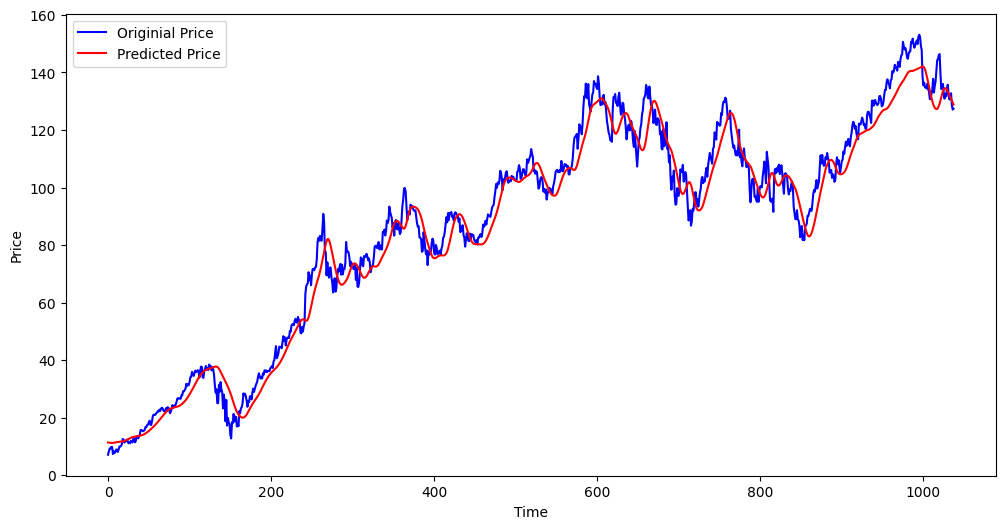

In [85]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Originial Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
